In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dill
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import scvelo as scv
scv.logging.print_version()

Running scvelo 0.1.26.dev33+g98921b2 (python 3.7.3) on 2020-05-08 15:45.


In [2]:
scv.settings.set_figure_params('scvelo')

In [3]:
adata=scv.read(filename="../submission/supplementary/adata_sensory.loom")

In [4]:
adata

AnnData object with n_obs × n_vars = 2245 × 55450 
    obs: 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced'

In [7]:
cell_cycle_genes = open("data/goatools_cellcycle_genes.txt").read().split()
adata=adata[:,(~np.in1d(adata.var_names, cell_cycle_genes))]

In [8]:
scv.pp.filter_and_normalize(adata, min_counts=20, min_counts_u=10,n_top_genes=4000)

Trying to set attribute `.obs` of view, copying.


Filtered out 32691 genes that are detected in less than 20 counts (spliced).
Filtered out 5756 genes that are detected in less than 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [10]:
adata

AnnData object with n_obs × n_vars = 2245 × 4000 
    obs: 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'means', 'dispersions', 'dispersions_norm'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [11]:
scv.pp.moments(adata)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing neighbors
    finished (0:00:03) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [12]:
umap=pd.read_csv("data/umap_sensory.csv",index_col=0)
adata.obsm['X_umap']=umap.values
adata.obs['clusters']=np.loadtxt(open("data/clusters_sensory.csv"), delimiter="\n",skiprows=1).astype(str)
adata.obs['clusters']=adata.obs['clusters'].astype('category')

In [13]:
scv.tl.velocity_embedding(adata,basis="umap")

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


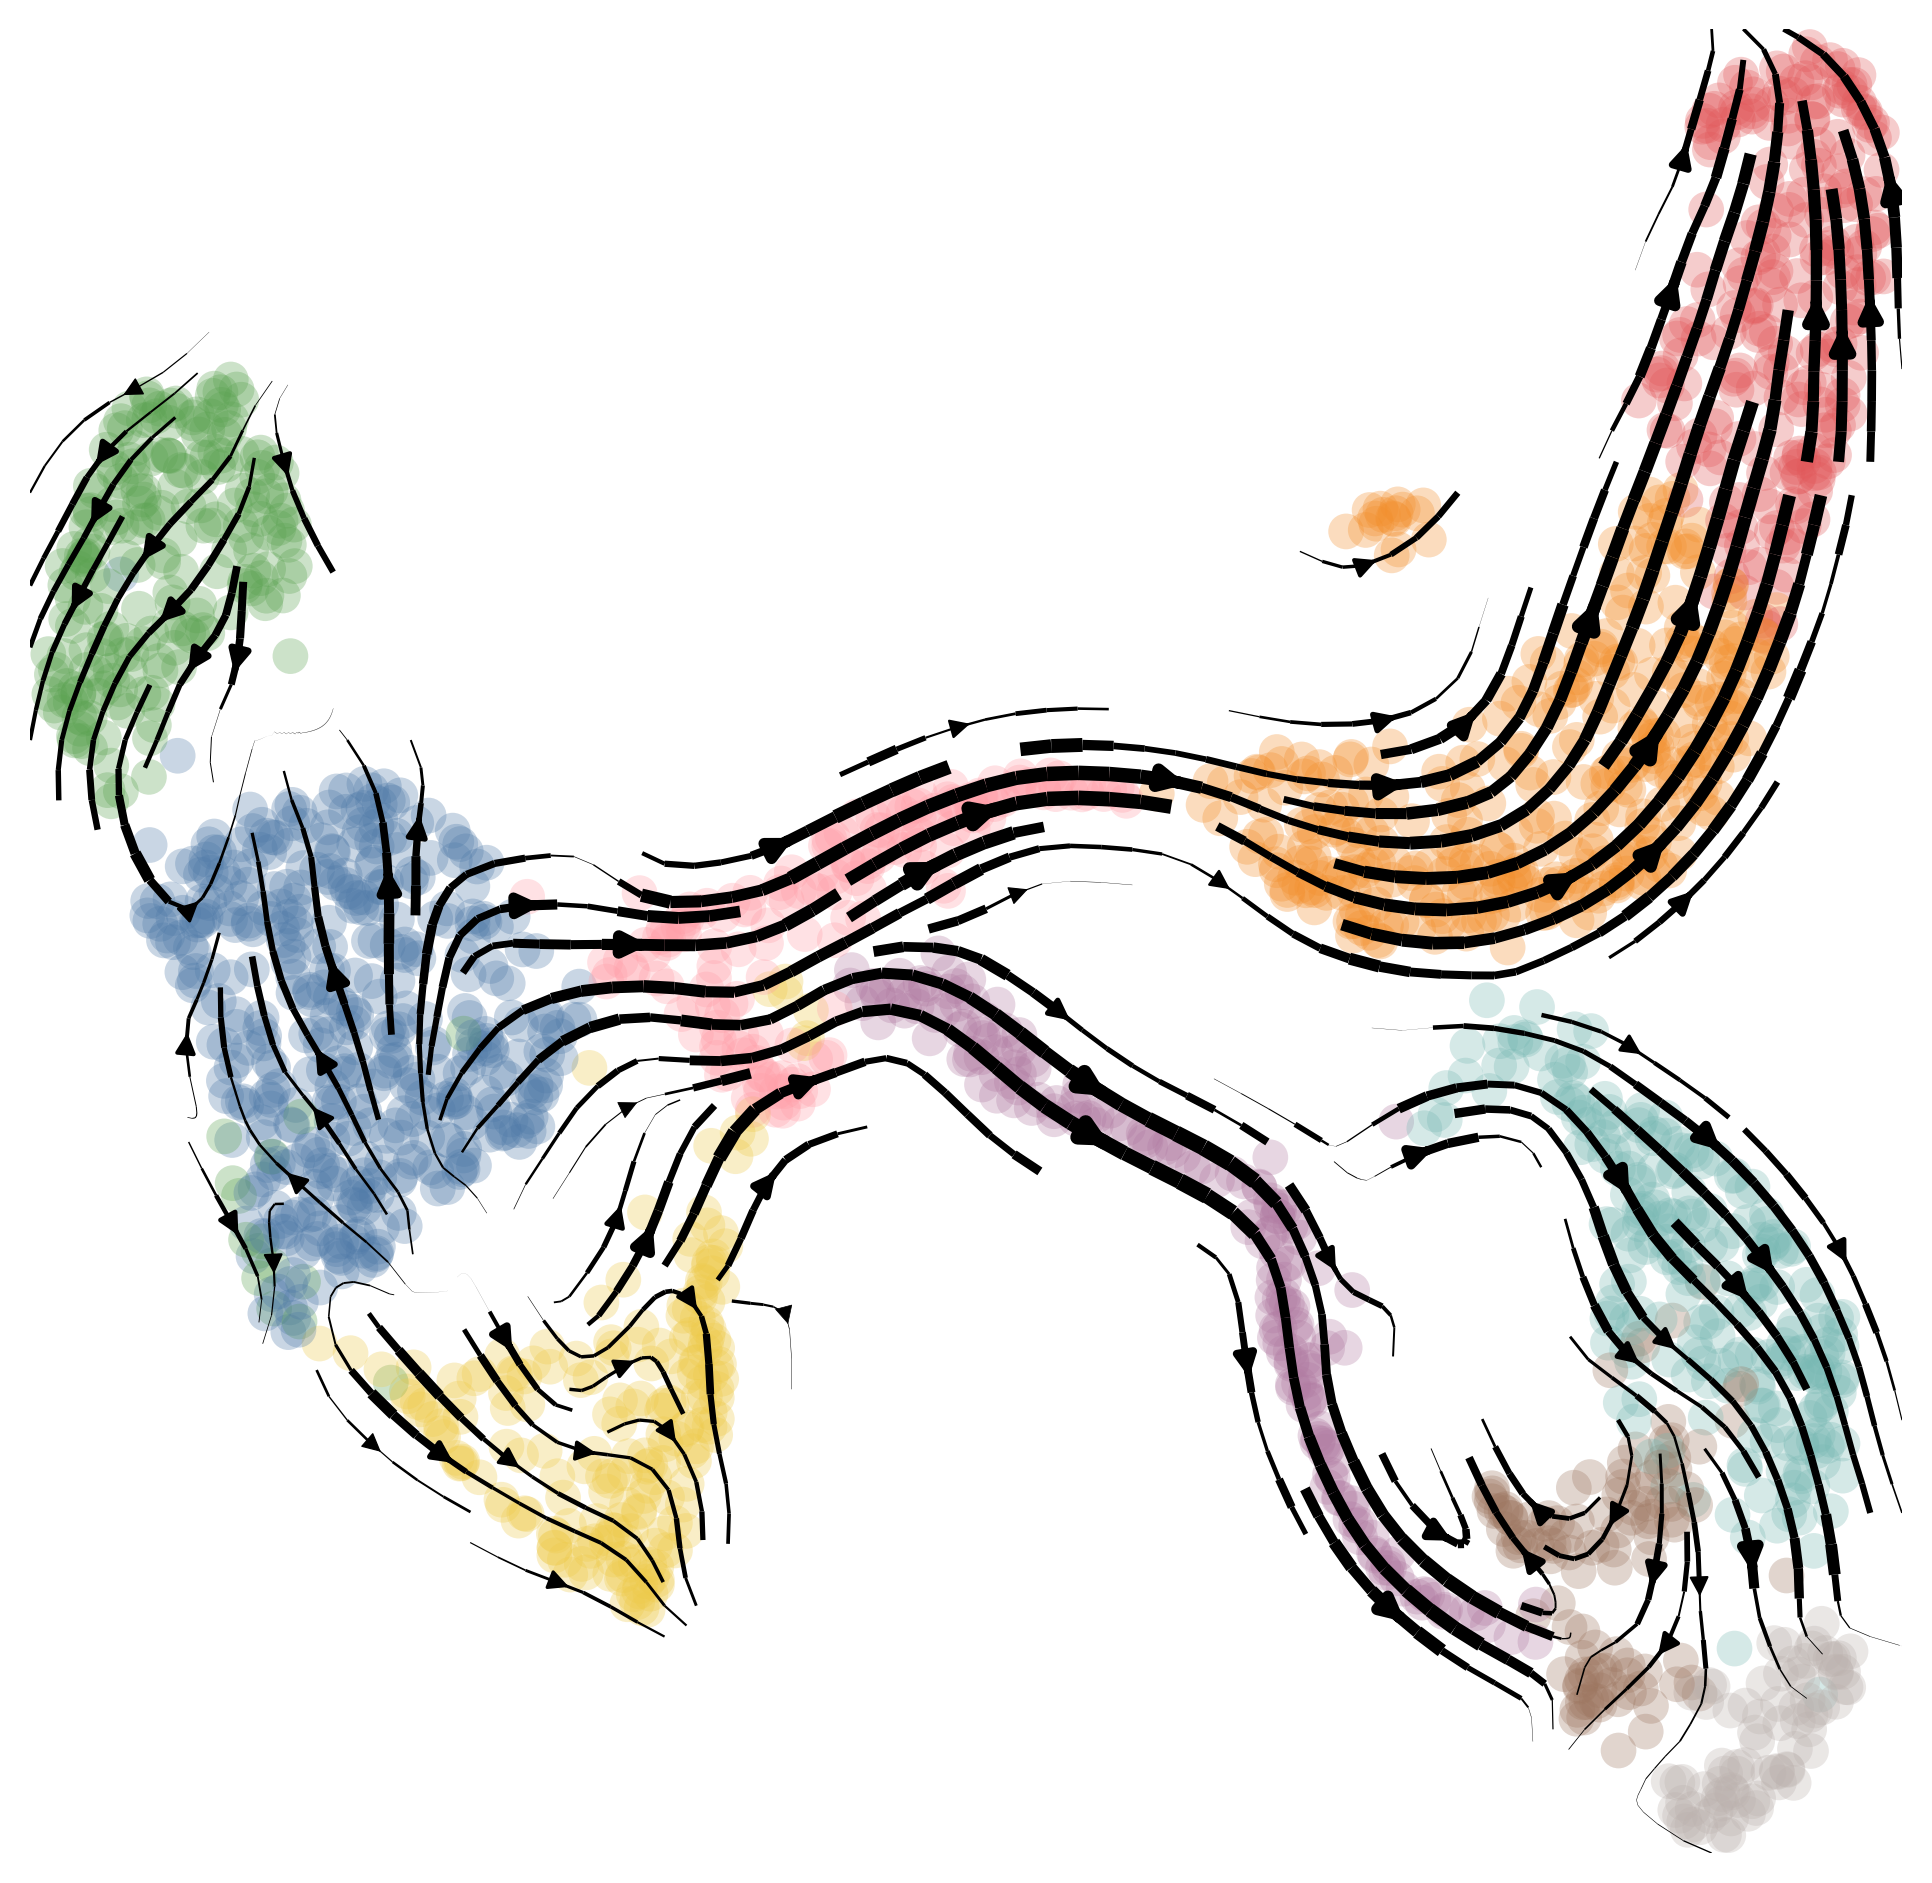

In [14]:
palette=["#4E79A7","#F28E2B","#E15759","#76B7B2","#59A14F","#EDC948","#B07AA1","#FF9DA7","#9C755F","#BAB0AC"]
palette=[palette[x] for x in (np.array(list(map(float, adata.obs["clusters"].cat.categories))).astype(int)-1).tolist()]
scv.pl.velocity_embedding_stream(adata,basis="umap",legend_loc='none',title="",figsize=[8,8],legend_fontsize=10,palette=palette,linewidth=2,dpi=150,cutoff_perc=.1)

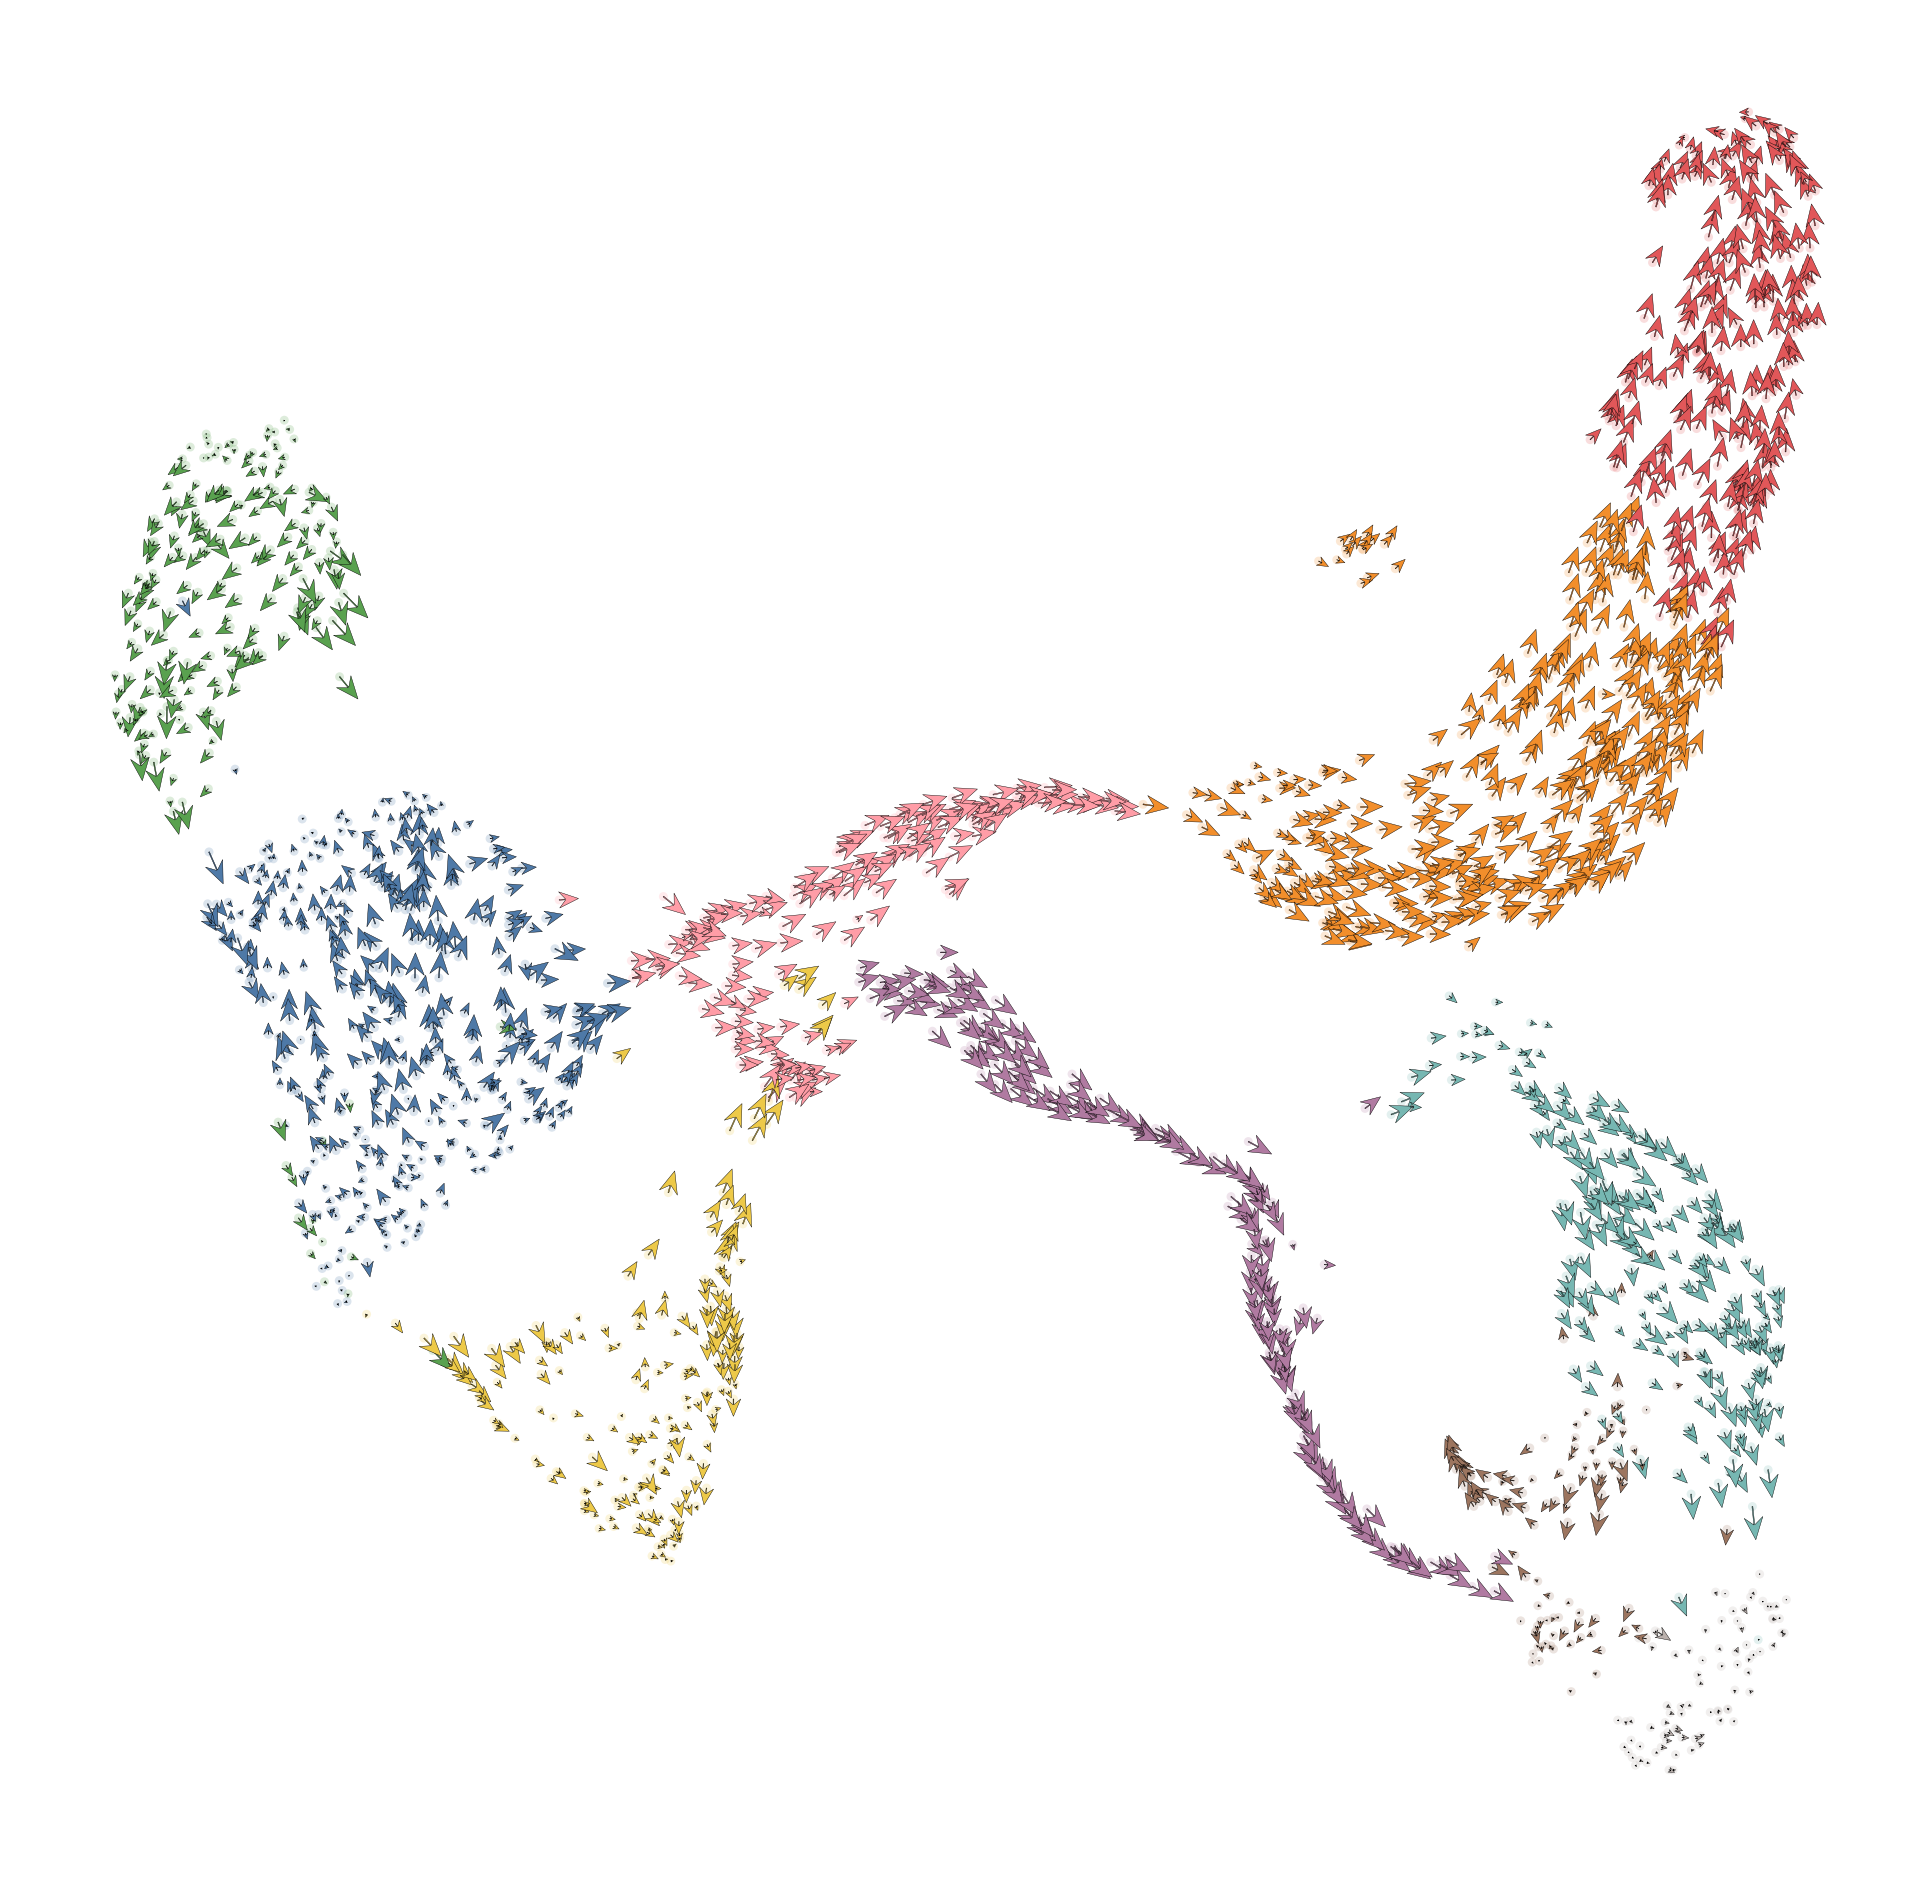

In [15]:
scv.pl.velocity_embedding(adata,basis="umap" ,legend_loc='none',figsize=[8,8],scale=.3,arrow_size=2,legend_fontsize=0,title="",dpi=150)

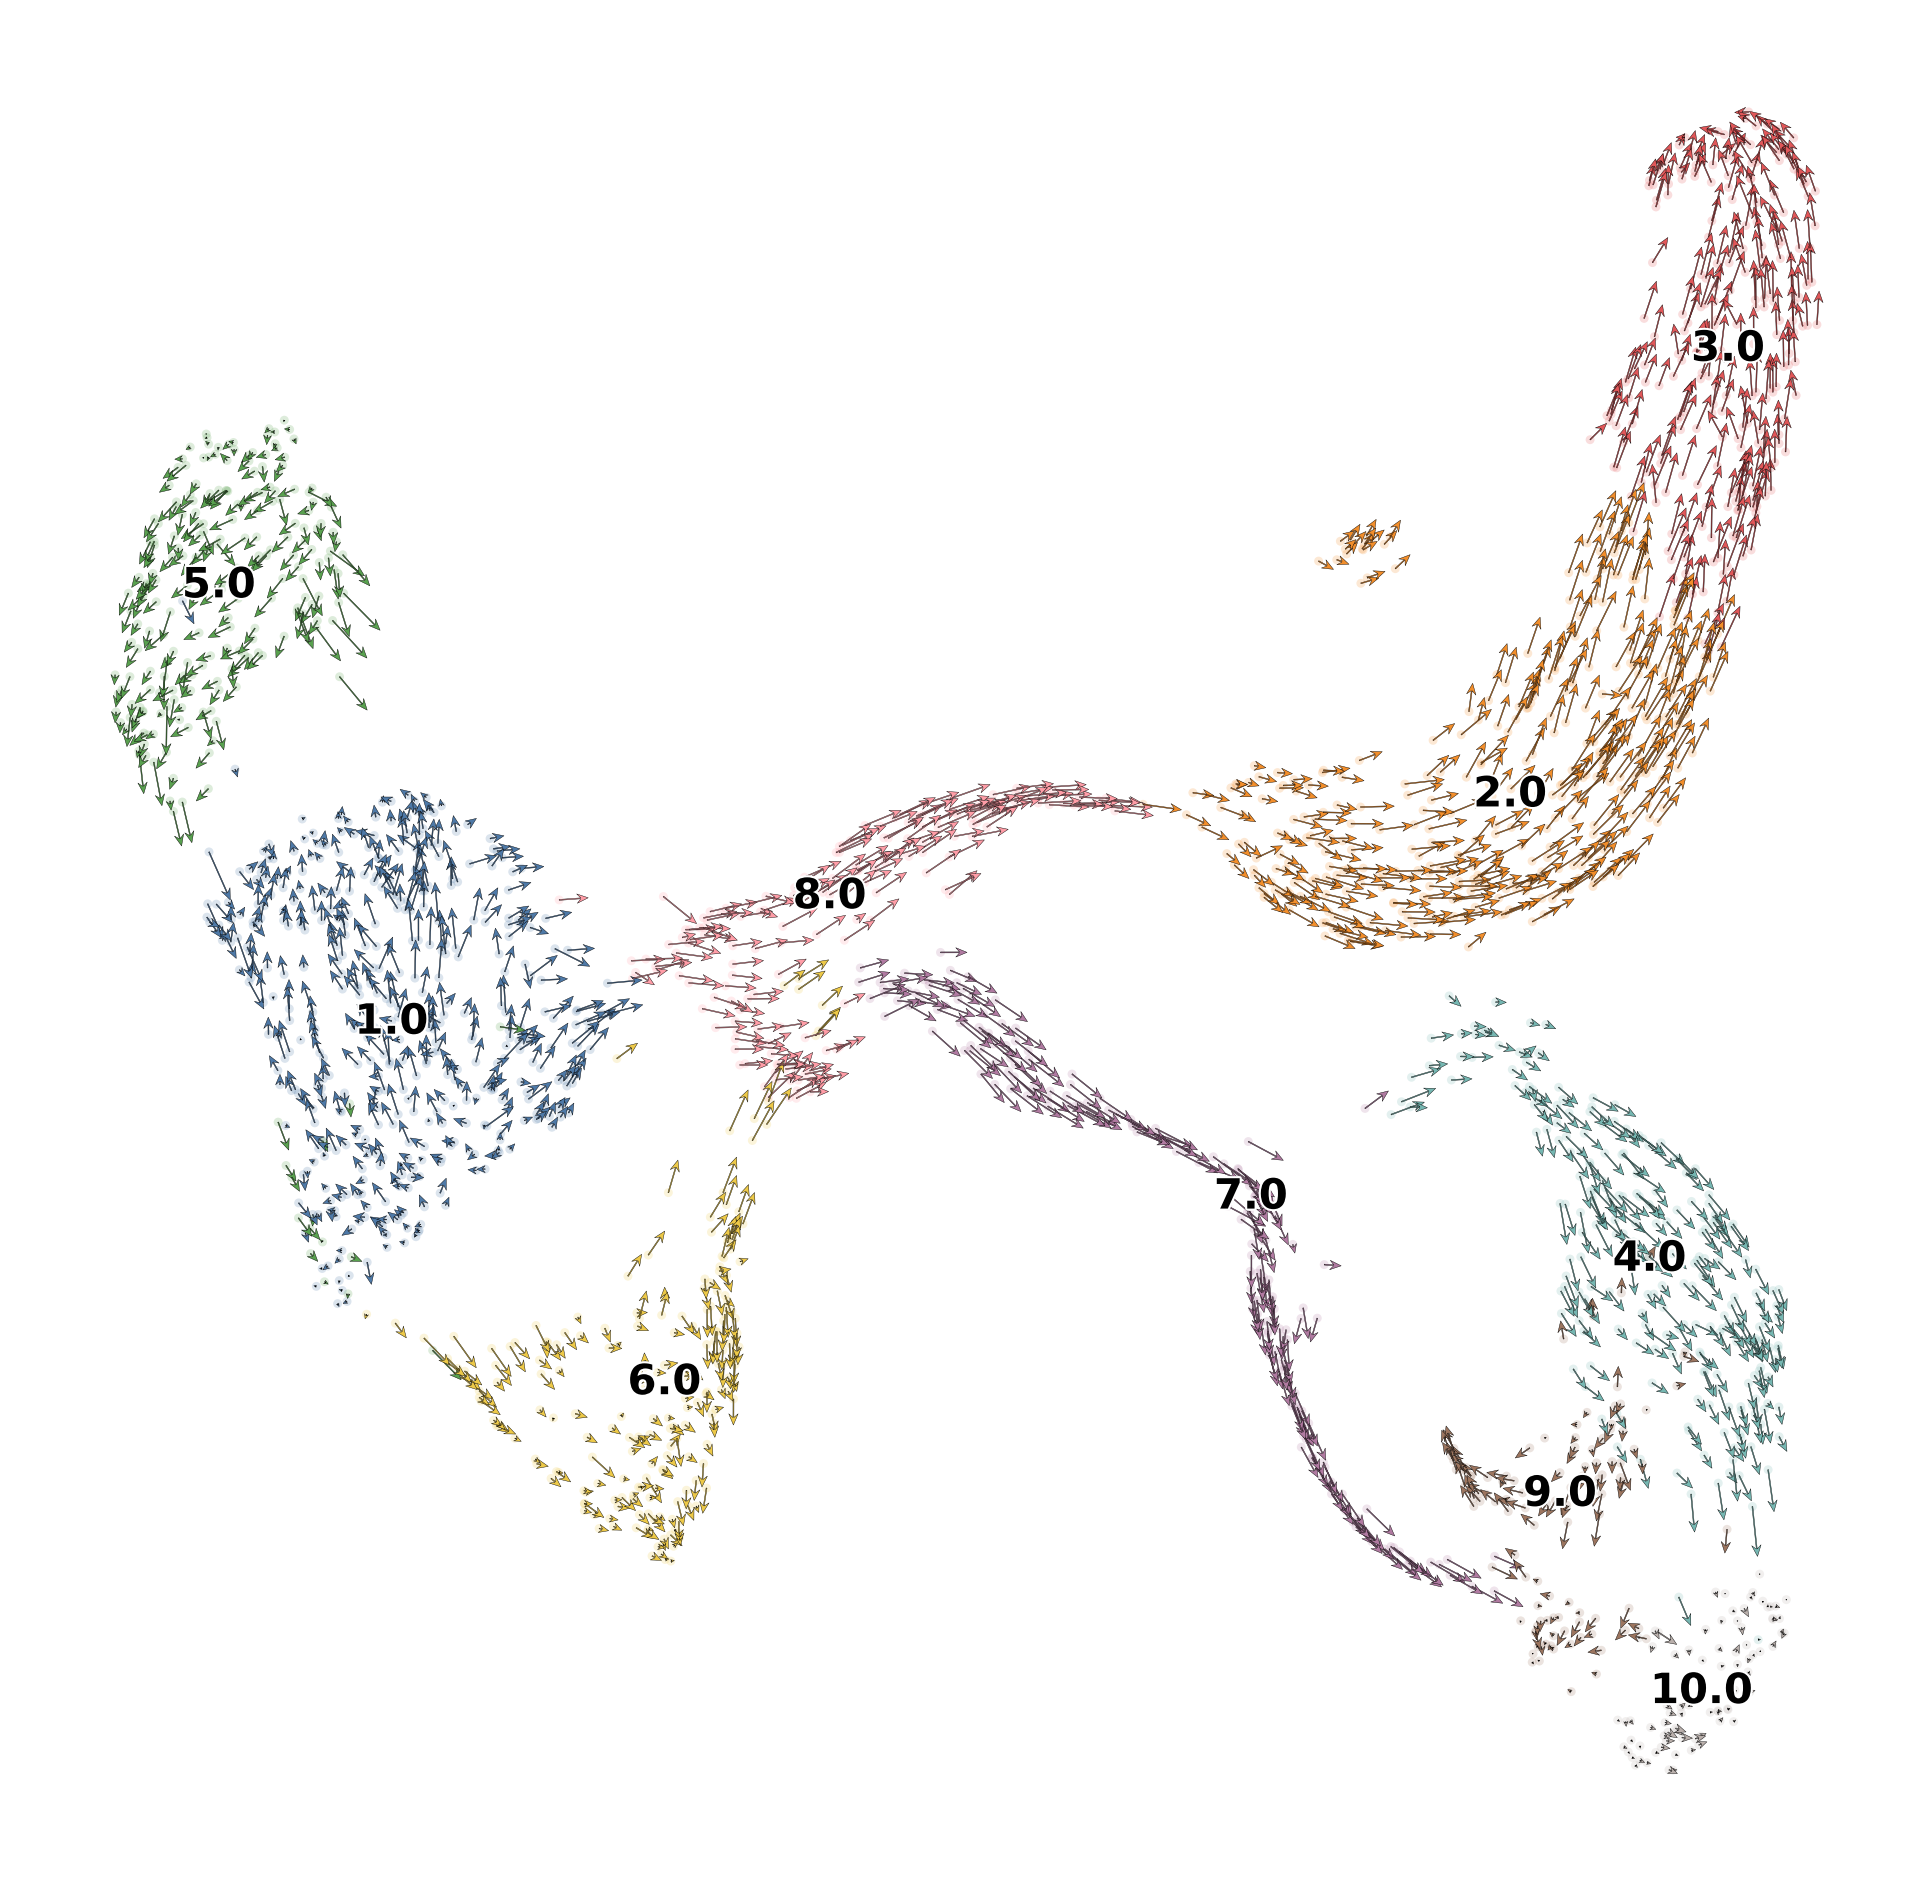

In [16]:
palette=["#4E79A7","#F28E2B","#E15759","#76B7B2","#59A14F","#EDC948","#B07AA1","#FF9DA7","#9C755F","#BAB0AC"]
palette=[palette[x] for x in (np.array(list(map(float, adata.obs["clusters"].cat.categories))).astype(int)-1).tolist()]
scv.pl.velocity_embedding(adata,basis="umap",color="clusters",legend_loc='on data',title="",figsize=[8,8],scale=.2, legend_fontsize=10,dpi=150)

In [19]:
adata.obs['Neurog']=pd.read_csv("data/Neurog_annot.csv").values

Trying to set attribute `.uns` of view, copying.


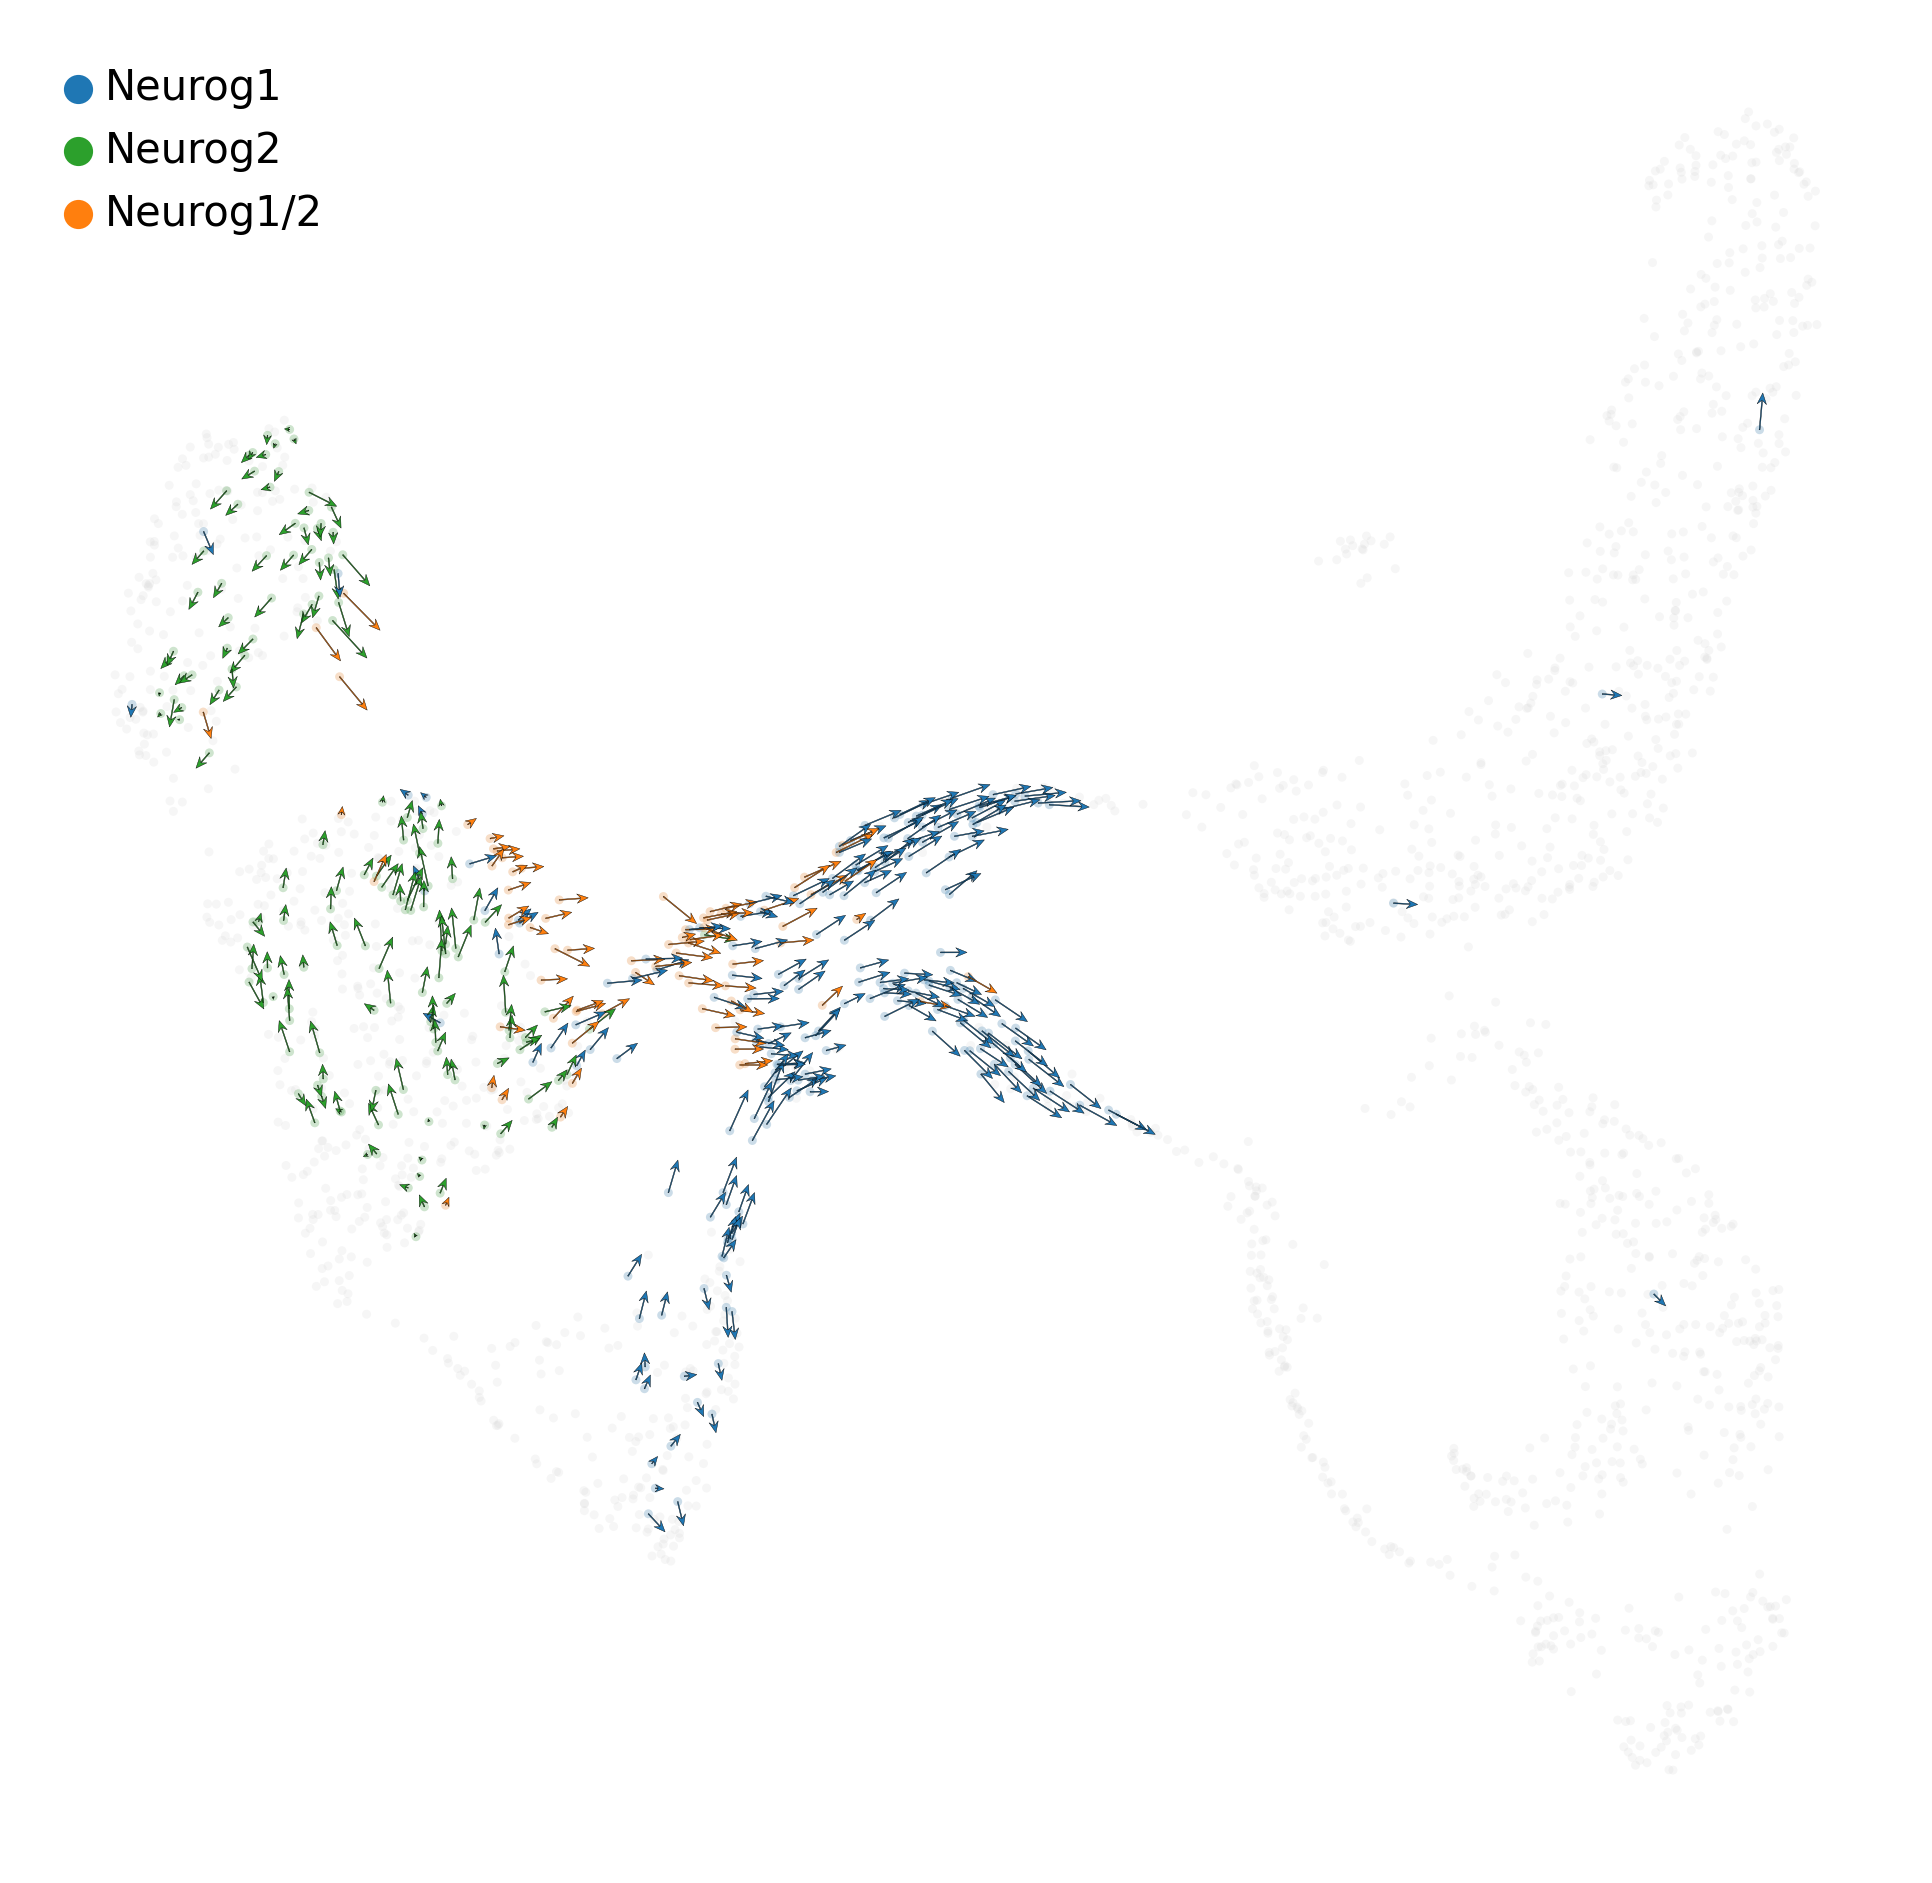

In [20]:
scv.pl.velocity_embedding(adata,basis="umap" ,legend_loc='upper left',color="Neurog",groups=["Neurog1","Neurog2","Neurog1/2"], alpha=.2,figsize=[8,8],legend_fontsize=10,scale=.2,title="",dpi=150)

In [25]:
scv.tl.terminal_states(adata,groupby="clusters",eps=5e-2)

computing terminal states
    identified 1 region of root cells and 1 region of end points  (1.0)
    identified 0 region of root cells and 1 region of end points  (10.0)
    identified 1 region of root cells and 1 region of end points  (2.0)
    identified 0 region of root cells and 1 region of end points  (3.0)
    identified 1 region of root cells and 1 region of end points  (4.0)
    identified 2 regions of root cells and 1 region of end points  (5.0)
    identified 1 region of root cells and 1 region of end points  (6.0)
    identified 1 region of root cells and 1 region of end points  (7.0)
    identified 1 region of root cells and 1 region of end points  (8.0)
    identified 1 region of root cells and 1 region of end points  (9.0)
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


In [26]:
scv.tl.terminal_states(adata,eps=.1)

computing terminal states
    identified 2 regions of root cells and 5 regions of end points 
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


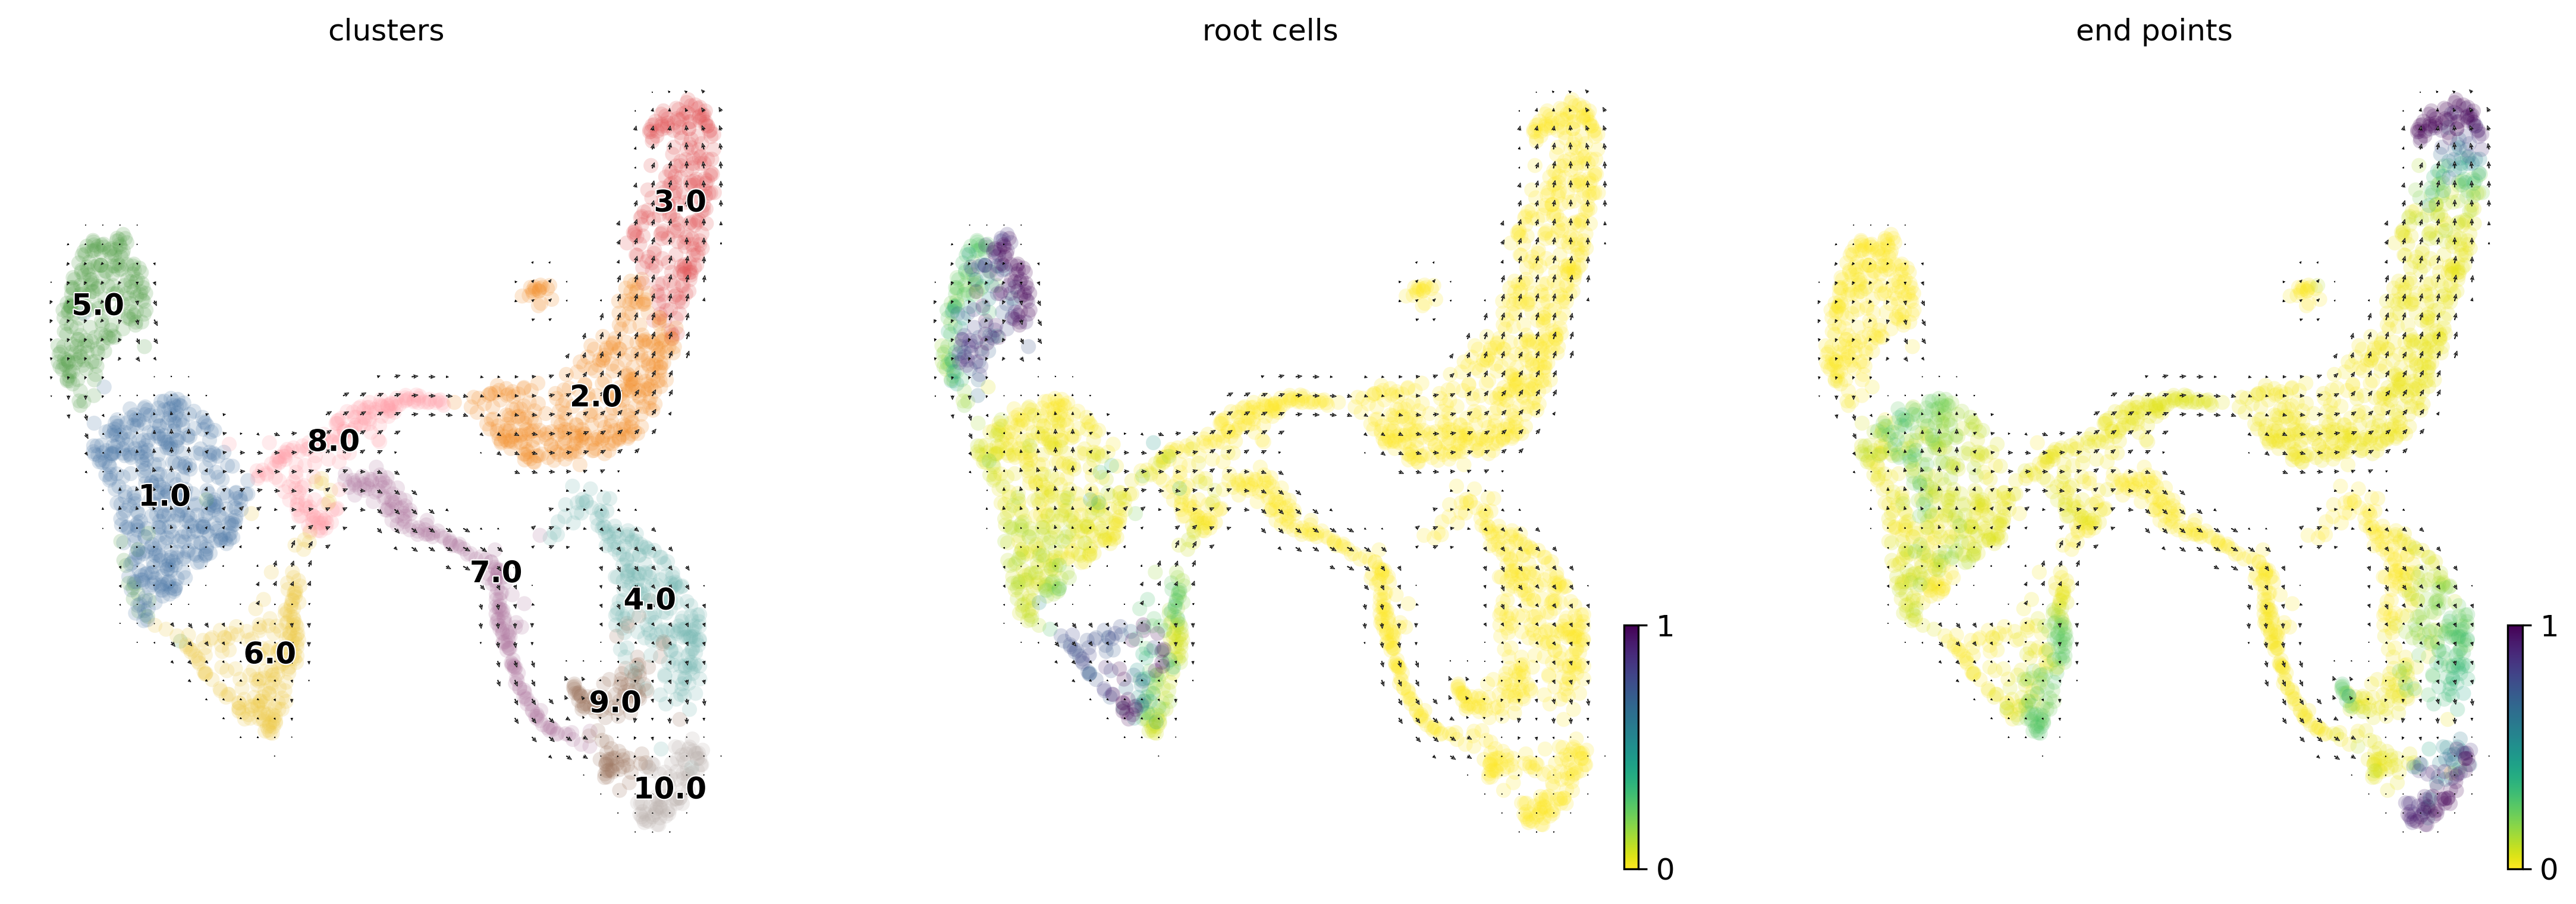

In [27]:
scv.pl.velocity_embedding_grid(adata, basis="umap",color=["clusters",'root_cells', 'end_points'], legend_loc='on data',figsize=[6,6],density=.8,dpi=150)